In [1]:
import sys
import os

# Add the parent directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Now you can import the module
import initialise as init

In [2]:
# read in the tsv files
jan_data = init.pd.read_csv('ipobs-AUS-adm2-2024-01_3hrly.tsv', sep='\t')
feb_data = init.pd.read_csv('ipobs-AUS-adm2-2024-02_3hrly.tsv', sep='\t')
mar_data = init.pd.read_csv('ipobs-AUS-adm2-2024-03_3hrly.tsv', sep='\t')
apr_data = init.pd.read_csv('ipobs-AUS-adm2-2024-04_3hrly.tsv', sep='\t')
may_data = init.pd.read_csv('ipobs-AUS-adm2-2024-05_3hrly.tsv', sep='\t')
jun_data = init.pd.read_csv('ipobs-AUS-adm2-2024-06_3hrly.tsv', sep='\t')
jul_data = init.pd.read_csv('ipobs-AUS-adm2-2024-07_3hrly.tsv', sep='\t')


In [3]:
# read in the json file
parent_directory = os.path.abspath(os.path.join(os.getcwd(), '..'))
json_file_path = os.path.join(parent_directory, 'australia_gadm2.geojson') #'simplified_australia_gadm2.json
adm2_json = init.gpd.read_file(json_file_path)
adm2_json['centroids'] = adm2_json['geometry'].centroid
print(adm2_json.columns)

Index(['fid', 'gid', 'id_0', 'iso', 'name_0', 'id_1', 'name_1', 'id_2',
       'name_2', 'geometry'],
      dtype='object')


In [4]:
print(jan_data.columns)

Index(['time_e', 'time_e_str', 'record_date', 'country_iso_three_char_code',
       'country_iso_name', 'adm1_name', 'adm2_name', 'adm1_unique_identifier',
       'adm2_unique_identifier', 'number_unique_active_ips_in_sample',
       'rtt_variance_norm', 'rtt_mean_norm', 'rtt_pctle_5', 'rtt_pctle_10',
       'rtt_pctle_25', 'rtt_pctle_50', 'rtt_pctle_75', 'rtt_pctle_90',
       'rtt_pctle_95', 'day_indicator'],
      dtype='object')


In [5]:
def get_monthly(adm, data):
    adm_data = data[data['adm2_name'] == adm]
    clean_5  = adm_data['rtt_pctle_5'].dropna()
    clean_10 = adm_data['rtt_pctle_10'].dropna()
    clean_25 = adm_data['rtt_pctle_25'].dropna()
    clean_50 = adm_data['rtt_pctle_50'].dropna()
    clean_75 = adm_data['rtt_pctle_75'].dropna()
    clean_90 = adm_data['rtt_pctle_90'].dropna()
    clean_95 = adm_data['rtt_pctle_95'].dropna()
    adm_5th = clean_5.mean()
    adm_10th = clean_10.mean()
    adm_25th = clean_25.mean()
    adm_50th = clean_50.mean()
    adm_75th = clean_75.mean()
    adm_90th = clean_90.mean()
    adm_95th = clean_95.mean()
    adm_sample = adm_data['number_unique_active_ips_in_sample'].mean()
    return [adm_5th, adm_10th, adm_25th, adm_50th, adm_75th, adm_90th, adm_95th, adm_sample]

adm2_json['5th Percentile']  = None
adm2_json['10th Percentile'] = None
adm2_json['25th Percentile'] = None
adm2_json['50th Percentile'] = None
adm2_json['75th Percentile'] = None
adm2_json['90th Percentile'] = None
adm2_json['95th Percentile'] = None
adm2_json['Sample Size']     = None

for adm in init.tqdm(adm2_json['name_2']):
    jan = get_monthly(adm, jan_data)
    feb = get_monthly(adm, feb_data)
    mar = get_monthly(adm, mar_data)
    apr = get_monthly(adm, apr_data)
    may = get_monthly(adm, may_data)
    jun = get_monthly(adm, jun_data)
    jul = get_monthly(adm, jul_data)
    
    months  = [jan, feb, mar, apr, may, jun, jul]
    perc_5  = [x[0] for x in months if not init.math.isnan(x[0])]
    perc_10 = [x[1] for x in months if not init.math.isnan(x[1])]
    perc_25 = [x[2] for x in months if not init.math.isnan(x[2])]
    perc_50 = [x[3] for x in months if not init.math.isnan(x[3])]
    perc_75 = [x[4] for x in months if not init.math.isnan(x[4])]
    perc_90 = [x[5] for x in months if not init.math.isnan(x[5])]
    perc_95 = [x[6] for x in months if not init.math.isnan(x[6])]
    sample  = [x[7] for x in months if not init.math.isnan(x[7])]

    if len(perc_5) != 0:
        adm2_json.loc[adm2_json['name_2'] == adm, '5th Percentile'] = sum(perc_5) / len(perc_5)

    if len(perc_10) != 0:
        adm2_json.loc[adm2_json['name_2'] == adm, '10th Percentile'] = sum(perc_10) / len(perc_10)

    if len(perc_25) != 0:
        adm2_json.loc[adm2_json['name_2'] == adm, '25th Percentile'] = sum(perc_25) / len(perc_25)

    if len(perc_50) != 0:
        adm2_json.loc[adm2_json['name_2'] == adm, '50th Percentile'] = sum(perc_50) / len(perc_50)

    if len(perc_75) != 0:
        adm2_json.loc[adm2_json['name_2'] == adm, '75th Percentile'] = sum(perc_75) / len(perc_75)

    if len(perc_90) != 0:
        adm2_json.loc[adm2_json['name_2'] == adm, '90th Percentile'] = sum(perc_90) / len(perc_90)

    if len(perc_95) != 0:
        adm2_json.loc[adm2_json['name_2'] == adm, '95th Percentile'] = sum(perc_95) / len(perc_95)

    if len(sample) != 0:
        adm2_json.loc[adm2_json['name_2'] == adm, 'Sample Size'] = sum(sample) / len(sample)


adm2_json['95th:5th Ratio'] = adm2_json['95th Percentile'] / adm2_json['5th Percentile']

100%|██████████| 1386/1386 [02:36<00:00,  8.83it/s]


In [6]:
#adm2_json.to_file('corrected_australia_adm2_percentiles.json', driver='GeoJSON')

In [7]:
lgas = init.gpd.read_file('australian_lgas.geojson')
print(lgas.columns)

Index(['geo_point_2d', 'year', 'ste_code', 'ste_name', 'lga_code', 'lga_name',
       'lga_area_code', 'lga_type', 'lga_name_long', 'geometry'],
      dtype='object')


In [35]:
from shapely.ops import nearest_points

def snap_point_to_nearest_lga(point, lgas, buffer_distance=0.001):
    # Create a small buffer around the point
    point_buffer = point.buffer(buffer_distance)

    # Check if the buffered point intersects with any LGA
    intersecting_lgas = lgas[lgas.intersects(point_buffer)]
    
    if not intersecting_lgas.empty:
        # If the buffered point intersects with one or more LGAs, find the closest LGA
        distances = intersecting_lgas.distance(point)
        nearest_lga_index = distances.idxmin()
        nearest_lga = intersecting_lgas.loc[nearest_lga_index]
        
        # Snap point to the nearest boundary of the nearest LGA
        snapped_point = nearest_points(point, nearest_lga.geometry.boundary)[1]
        
        # Ensure the snapped point is inside the nearest LGA
        if nearest_lga.geometry.contains(snapped_point):
            return snapped_point
        
        # If the snapped point is not within the nearest LGA, try to find a valid point
        else:
            # Use the `nearest_points` function to ensure the point is within the boundary
            snapped_point = nearest_lga.geometry.representative_point()
            return snapped_point
    
    # If no LGA intersects with the buffered point, find the nearest LGA and snap to its boundary
    distances = lgas.distance(point)
    nearest_lga_index = distances.idxmin()
    nearest_lga = lgas.loc[nearest_lga_index]
    
    # Snap point to the nearest boundary of the nearest LGA
    snapped_point = nearest_points(point, nearest_lga.geometry.boundary)[1]
    
    # Check if the snapped point is inside the LGA, and if not, adjust
    if nearest_lga.geometry.contains(snapped_point):
        return snapped_point
    else:
        # If not inside, use the LGA's representative point (a point guaranteed to be inside)
        return nearest_lga.geometry.representative_point()

def region_finder(region, point, column):
    for i in range(len(region)):
        if region['geometry'][i].contains(point):
            return region[column][i]
    
    return None

adm2_json['lga_code'] = None
adm2_json['snapped point'] = None

missing_adms = init.pd.DataFrame()
for unique_adm in init.tqdm(adm2_json['id_2']):
    # Try to find the LGA code for the ADM
    adm2_lga_code = region_finder(lgas, adm2_json[adm2_json['id_2'] == unique_adm]['centroids'].values[0], 'lga_code')

    # In the case we can't find it, snap the point and try again
    if adm2_lga_code is None:

        # snap and try again
        snapped_point = snap_point_to_nearest_lga(adm2_json[adm2_json['id_2'] == unique_adm]['centroids'].values[0], lgas)
        adm2_json.loc[adm2_json['id_2'] == unique_adm, 'snapped point'] = snapped_point
        adm2_lga_code = region_finder(lgas, snapped_point, 'lga_code')
        adm2_json.loc[adm2_json['id_2'] == unique_adm, 'lga_code'] = adm2_lga_code

        if adm2_lga_code is None:
            temp_df = adm2_json[adm2_json['id_2'] == unique_adm]
            missing_adms = init.pd.concat([missing_adms, temp_df], ignore_index=True)
        
    else: 
        adm2_json.loc[adm2_json['id_2'] == unique_adm, 'lga_code'] = adm2_lga_code

print('There are ', len(missing_adms), ' missing ADMs')

  0%|          | 0/1386 [00:00<?, ?it/s]

 16%|█▌        | 218/1386 [00:06<00:23, 50.72it/s]C:\Users\43472\AppData\Local\Temp\ipykernel_7812\374967760.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distances = intersecting_lgas.distance(point)
 18%|█▊        | 248/1386 [00:07<00:26, 43.61it/s]C:\Users\43472\AppData\Local\Temp\ipykernel_7812\374967760.py:30: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distances = lgas.distance(point)
 20%|█▉        | 276/1386 [00:08<00:33, 32.67it/s]C:\Users\43472\AppData\Local\Temp\ipykernel_7812\374967760.py:30: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distances = 

There are  0  missing ADMs


In [74]:
lgas['5th Percentile']  = None
lgas['10th Percentile'] = None
lgas['25th Percentile'] = None
lgas['50th Percentile'] = None
lgas['75th Percentile'] = None
lgas['90th Percentile'] = None
lgas['95th Percentile'] = None
lgas['Sample Size']     = None
lgas['95th:5th Ratio']  = None
lgas['centroids']       = lgas['geometry'].centroid

def new_average(measurements, samples):
    # Remove cases with no measurements
    if len(measurements) == 0:
        return None
    
    # Otherwise, calculate the weighted average
    else:
        measurement_sum = 0
        for idx in range(len(measurements)):
            measurement_sum += measurements[idx] * samples[idx]

    return measurement_sum / sum(samples)

missing_lgas = init.gpd.GeoDataFrame()

for lga in init.tqdm(lgas['lga_code']):
    adm2_json_lgas = adm2_json[adm2_json['lga_code'] == lga]
    if len(adm2_json_lgas) == 0:
        temp_df = lgas[lgas['lga_code'] == lga]
        missing_lgas = init.pd.concat([missing_lgas, temp_df], ignore_index=True)

    else:
        lgas.loc[lgas['lga_code'] == lga, '5th Percentile'] = new_average([x for x in list(adm2_json_lgas['5th Percentile']) if x is not None], [x for x in list(adm2_json_lgas['Sample Size']) if x is not None])
        lgas.loc[lgas['lga_code'] == lga, '10th Percentile'] = new_average([x for x in list(adm2_json_lgas['10th Percentile']) if x is not None], [x for x in list(adm2_json_lgas['Sample Size']) if x is not None])
        lgas.loc[lgas['lga_code'] == lga, '25th Percentile'] = new_average([x for x in list(adm2_json_lgas['25th Percentile']) if x is not None], [x for x in list(adm2_json_lgas['Sample Size']) if x is not None])
        lgas.loc[lgas['lga_code'] == lga, '50th Percentile'] = new_average([x for x in list(adm2_json_lgas['50th Percentile']) if x is not None], [x for x in list(adm2_json_lgas['Sample Size']) if x is not None])
        lgas.loc[lgas['lga_code'] == lga, '75th Percentile'] = new_average([x for x in list(adm2_json_lgas['75th Percentile']) if x is not None], [x for x in list(adm2_json_lgas['Sample Size']) if x is not None])
        lgas.loc[lgas['lga_code'] == lga, '90th Percentile'] = new_average([x for x in list(adm2_json_lgas['90th Percentile']) if x is not None], [x for x in list(adm2_json_lgas['Sample Size']) if x is not None])
        lgas.loc[lgas['lga_code'] == lga, '95th Percentile'] = new_average([x for x in list(adm2_json_lgas['95th Percentile']) if x is not None], [x for x in list(adm2_json_lgas['Sample Size']) if x is not None])
        lgas.loc[lgas['lga_code'] == lga, '95th:5th Ratio']  = lgas.loc[lgas['lga_code'] == lga, '95th Percentile'] / lgas.loc[lgas['lga_code'] == lga, '5th Percentile']

print('There are', len(missing_lgas),' missing LGAs')

C:\Users\43472\AppData\Local\Temp\ipykernel_7812\1446452190.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lgas['centroids']       = lgas['geometry'].centroid
100%|██████████| 547/547 [00:07<00:00, 77.35it/s] 

There are 9  missing LGAs


In [163]:
print('Chosen code is', chosen_adm2_code)
print()
print(adm2_json.iloc[0]['lga_code'])
test = adm2_json[adm2_json['lga_code'] == '36950']
if test.empty:
    print("Code doesn't recognise lga")

Chosen code is 36950

89399
Code doesn't recognise lga


This is Torres in Queensland


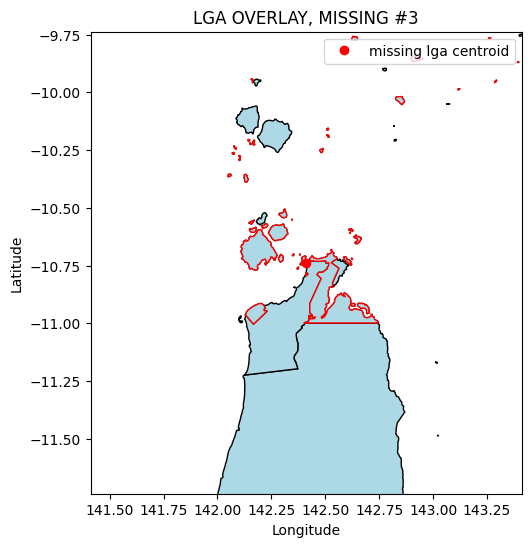

Corresponding ADM2 is Torres
But Torres  was allocated to 329    Northern Peninsula Area


C:\Users\43472\AppData\Local\Temp\ipykernel_7812\374967760.py:30: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distances = lgas.distance(point)


ValueError: aspect must be finite and positive 

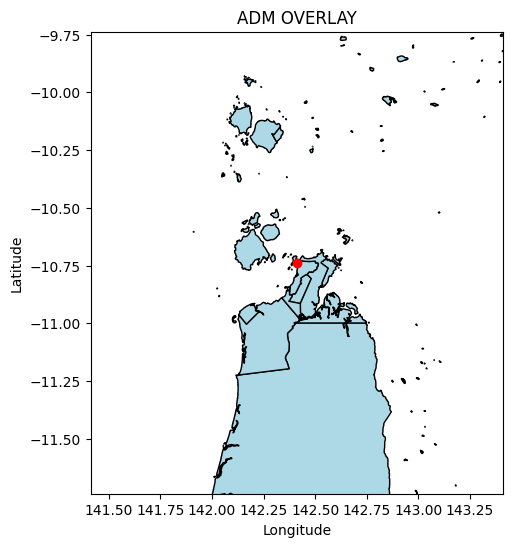

In [139]:
from shapely.geometry import Point

def find_containing_geometries(gdf, point):
    """
    Find geometries in the GeoDataFrame that contain the specified point.
    
    Parameters:
    gdf (GeoDataFrame): GeoDataFrame containing the geometries.
    point (shapely.geometry.Point): Point to check against the geometries.

    Returns:
    GeoDataFrame: GeoDataFrame with geometries that contain the point.
    """
    # Ensure the point is a Shapely Point object
    if not isinstance(point, Point):
        raise ValueError("The provided point is not a Shapely Point object.")
    
    # Check which geometries contain the point
    containing_geometries = gdf[gdf['geometry'].apply(lambda geom: geom.contains(point))]
    
    return containing_geometries

# lga_plot should be 0-8 (range of 9)
lga_plot = 3
bounds = 1

# Plot the polygons
fig, ax = init.plt.subplots(figsize=(6, 6))  # Create figure and axis

# Plot the polygons on the axis
lgas.plot(ax=ax, edgecolor='black', facecolor='lightblue')

# Optional: Add titles or labels
ax.set_title('LGA OVERLAY, MISSING #' + str(lga_plot))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Extract a single point from the 'centroids' column
point_geom = missing_lgas.iloc[lga_plot]['centroids']

# Plot the point on the same axis
ax.plot(point_geom.x, point_geom.y, 'o', color='red', label = 'missing lga centroid')  # 'o' for point marker
missing_lgas.plot(ax=ax, edgecolor='red',facecolor='lightblue')

# Set axis limits based on the point's coordinates
init.plt.xlim(point_geom.x - bounds, point_geom.x + bounds)
init.plt.ylim(point_geom.y - bounds, point_geom.y + bounds)

print('This is', missing_lgas.iloc[lga_plot]['lga_name_long'],'in', missing_lgas.iloc[lga_plot]['ste_name'])

# Show the plot
init.plt.gca().legend()
init.plt.show()

######## VISUALISE ADM2s ########

# Plot the polygons
fig, ax = init.plt.subplots(figsize=(6, 6))  # Create figure and axis

# Plot the polygons on the axis
adm2_json.plot(ax=ax, edgecolor='black', facecolor='lightblue')

# Optional: Add titles or labels
ax.set_title('ADM OVERLAY')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Extract a single point from the 'centroids' column
point_geom = missing_lgas.iloc[lga_plot]['centroids']

# Plot the point on the same axis
ax.plot(point_geom.x, point_geom.y, 'o', color='red', label = 'missing lga centroid')  # 'o' for point marker

# Set axis limits based on the point's coordinates
init.plt.xlim(point_geom.x - bounds, point_geom.x + bounds)
init.plt.ylim(point_geom.y - bounds, point_geom.y + bounds)

# Call the function
chosen_adm2 = find_containing_geometries(lgas, point_geom)
# In case point_geom is not mainland Australia
if chosen_adm2.empty:
    snap_point = snap_point_to_nearest_lga(point_geom, lgas)
    chosen_adm2 = find_containing_geometries(lgas, snap_point)
chosen_adm2_name = chosen_adm2['lga_name'].values[0]
chosen_adm2_code = chosen_adm2.iloc[0]['lga_code']
print('Corresponding ADM2 is', chosen_adm2_name)

allocated_lga_code = adm2_json[adm2_json['name_2'] == chosen_adm2_name]['lga_code'].values[0]
allocated_lga_name = lgas[lgas['lga_code'] == allocated_lga_code]['lga_name']
print('But', chosen_adm2_name,' was allocated to', lgas[lgas['lga_code'] == allocated_lga_code]['lga_name'].to_string())
chosen = adm2_json[adm2_json['lga_code'] == chosen_adm2_code]

# Plot the polygons on the axis
chosen.plot(ax=ax, edgecolor='red')
centroid = chosen['centroids']
ax.plot(centroid.x, centroid.y, 'o', color='black', label='adm centroid')

init.plt.gca().legend()
init.plt.show()

######## VISUALISE LGAs ########

# Plot the polygons
fig, ax = init.plt.subplots(figsize=(6, 6))  # Create figure and axis

# Plot the polygons on the axis
lgas.plot(ax=ax, edgecolor='black', facecolor='lightblue')

# Optional: Add titles or labels
ax.set_title('ALLOCATED LGA, #' + str(lga_plot))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Extract a single point from the 'centroids' column
#point_geom = chosen['centroids']
allocated_lga = lgas[lgas['lga_code'] == chosen.iloc[0]['lga_code']]
allocated_lga.plot(ax=ax, edgecolor='red')

# Plot the point on the same axis
#ax.plot(point_geom.x, point_geom.y, 'o', color='red')  # 'o' for point marker
init.plt.plot(allocated_lga['centroids'].x, allocated_lga['centroids'].y, 'o', color='red', label = 'allocated lga centroid')

# Extract the single geometry from the GeoSeries
#point_geom = chosen['centroids'].iloc[0]  # Get the single geometry
point_geom = missing_lgas.iloc[lga_plot]['centroids']

# Set axis limits based on the point's coordinates
ax.set_xlim(point_geom.x - bounds, point_geom.x + bounds)
ax.set_ylim(point_geom.y - bounds, point_geom.y + bounds)

print('This is', allocated_lga['lga_name_long'].to_string(),', lga code', chosen.iloc[0]['lga_code'])

# Show the plot
init.plt.gca().legend()
init.plt.show()